# INP: Interpolation #
## si-Interpolation ##

Darstellung der Phase eines Sinussignals in Abhängigkeit der Verzögerung für Folien etc.


In [ ]:
import numpy as np
from numpy import (pi, log10, sqrt, exp, sin, cos, tan, angle, arange,
                    linspace, array, zeros, ones)

import scipy.signal as sig

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel,
    subplot, title, clf, xlim, ylim)

PRINT = False           
#BASE_DIR = "/home/muenker/Daten/HM/dsvFPGA/Vorlesung/2016ss/nologo/img/"
BASE_DIR = "D:/Daten/HM/dsvFPGA/Vorlesung/2016ss/nologo/img/"
FILENAME = "SMP-si_interpolate" 
FMT = ".svg"

#mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rc('xtick', labelsize=16, direction='in')#, major.size = 4)
mpl.rc('xtick.major', size = 4)
mpl.rc('ytick', labelsize=16, direction='in')
mpl.rc('ytick.major', size = 4)
mpl.rc('lines', markersize = 6)

#mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['axes.labelsize'] = 20

def scale_axis(val, scale = 0.1):
    delta = abs(max(val) - min(val))
    return [min(val) - delta * scale, max(val) + delta * scale]

figsize = (7,3.5)

0.09999999999999994
0.39999999999999997
0.7000000000000001
1.0
0.7000000000000001
0.39999999999999997
0.09999999999999994


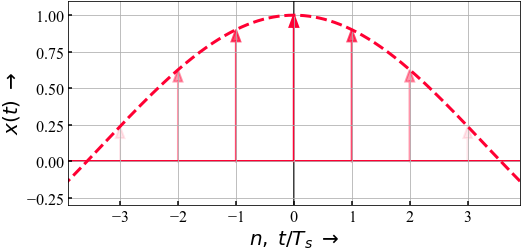

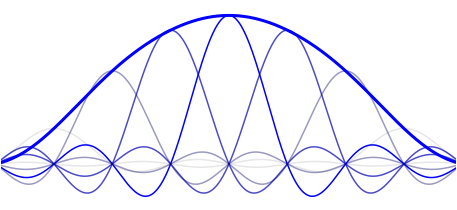

In [2]:
fsig = 0.1 # signal frequency in kHz
Tmax = 8#e-3 # max. simulation time
fs = 1 # sampling frequency in kHz
Ts = 1./fs

N = 1000 # plot points
NPlots = 6 # number of plots

# generate time array

t = linspace(0,Tmax,num=N)-Tmax//2 # "analog" time 0 ... NFFT in NFFT*OSR steps

def myfnc(t):
    return sig.gausspulse(t, fc = 0.07)

bbox_props = dict(boxstyle="Round, pad=0.3", fc="white", ec="k", lw=1)

fig1 = figure(figsize=figsize, num = 1)
ax1 = fig1.add_subplot(111)
fig2 = figure(figsize=figsize, num = 2)
ax2 = fig2.add_subplot(111)

fig1.patch.set_alpha(0.)
ax1.patch.set_alpha(0.)
fig2.patch.set_alpha(0.)
ax2.patch.set_alpha(0.)

ax2.grid(False)
#ax1.set_title("si-Interpolation")

xs = 0
tn = []
xn = []
for i in arange(-NPlots//2, NPlots//2 +1): 
    a = (NPlots - 1.8*abs(i))/NPlots # transparency
    x = myfnc(i*Ts)*np.sinc(fs*(t-i*Ts)) # pi is already included in sinc definition

    ax1.arrow(i*Ts, 0, 0, myfnc(i*Ts), head_width=0.15, head_length=0.08, transform=ax1.transData,
              fc=(1,0,0.2), ec=(1,0,0.2), linewidth = 2, alpha = a, length_includes_head = True)
    ax2.plot(t,x, alpha = a, color = (0, 0, a))
    print(a)
    tn.append(i*Ts)
    xn.append(myfnc(i*Ts))
    xs += x # sum up all interpolation functions

ax1.plot(t, myfnc(t), lw = 3, c = (1,0,0.2), linestyle = '--')
ax2.plot(t,xs, color = 'b', lw = 3)


ax1.axhline(y = 0, color=(1,0,0.2), lw = 2, zorder = 0)
ax1.axvline(x = 0, color='k', zorder = 0)

ax1.set_xlabel(r'$n, \; t / T_s \; \rightarrow$')
ax1.set_ylabel(r'$ x(t) \; \rightarrow$')

ax2.set_xlabel(r'$\;$', color = 'none')
ax2.set_ylabel(r'$\;$', color = 'none')



ax1.set_xlim([-Tmax//2 + 0.1, Tmax//2 - 0.1])
ax2.set_xlim([-Tmax//2+ 0.1, Tmax//2 - 0.1])
ax1.set_ylim([-0.3, 1.1])
ax2.set_ylim([-0.3, 1.1])
    
#ax1.text(TDel, 0.5, r'$ N = %d$'%(TDel),
#        horizontalalignment='center',
#        verticalalignment='bottom',
#        fontsize=16, color='k',
#        transform=ax1.transData,
#        bbox = bbox_props)

fig1.tight_layout(pad = 0.1)
fig2.tight_layout(pad = 0.1)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_frame_on(False)


if PRINT:
    fig1.savefig(BASE_DIR + FILENAME + "_1" + FMT, transparent=True)
    fig2.savefig(BASE_DIR + FILENAME + "_2" + FMT)


plt.show()

In [ ]:
def sinc_interp(x, s, u):
    """
    Interpolates x, sampled at "s" instants
    Output y is sampled at "u" instants ("u" for "upsampled")
    Originally from Matlab: http://phaseportrait.blogspot.com/2008/06/sinc-interpolation-in-matlab.html 
    Adopted by Endolith, https://gist.github.com/endolith/1297227
    """
    
    if len(x) != len(s):
        raise Exception, 'x and s must be the same length'
    
    # Find the period    
    T = s[1] - s[0]
    
    sincM = tile(u, (len(s), 1)) - tile(s[:, newaxis], (1, len(u)))
    y = dot(x, sinc(sincM/T))
return y

***
**Copyright**

(c) 2016 - 2019 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2019*.